# Explore here

In [1]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


file = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(file)
print(df.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [3]:
df.shape
df.info()

contain_na = df.isna().any().any()
print(f"Does the dataset contain NAs? : ", contain_na)
for column in df.columns:
    if df[column].isna().any():
        print(f"Column '{column}' contains NaN values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# checkear que los valores tienen sentido
# last_review está en formato object, y no en date-time, so we need to address it
print(df.shape)
print(df.isnull().sum())
print("The columns last_review and reviews_per_month have a significant amount of nulls")
print("This is probably related to the houses that have 0 reviews")

(48895, 16)
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
The columns last_review and reviews_per_month have a significant amount of nulls
This is probably related to the houses that have 0 reviews


In [5]:
df_rev = df.loc[df['number_of_reviews'] == 0, ['reviews_per_month','last_review']]

# change this from NaN to 0

print(df_rev.shape)
print("We observe that this filtered dataset contains all the null values previously seen on the compared variables")

if df_rev['last_review'].sum() == df_rev['reviews_per_month'].sum():
    print(True)

# replacing null values with zeros and dropping the last_review column

df['reviews_per_month'].fillna(0, inplace=True)
df.drop(columns='last_review', axis=1, inplace=True)
print(df.isnull().sum())


(10052, 2)
We observe that this filtered dataset contains all the null values previously seen on the compared variables
True
id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


C:\Users\34616\AppData\Local\Temp\ipykernel_6604\2323523313.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [6]:
df['room_type'].unique()
# convertir los roomtypes en numberos (1, 2, 3)
print(df.duplicated().sum())



0


In [7]:
# Replacing null values in names for Unknown
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


C:\Users\34616\AppData\Local\Temp\ipykernel_6604\3119463327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
C:\Users\34616\AppData\Local\Temp\ipykernel_6604\3119463327.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [8]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [9]:

print(df['neighbourhood'].unique())
print(df['neighbourhood_group'].unique())
print(df['room_type'].unique())





['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [50]:
print(df.neighbourhood.value_counts() < 10)
print(df.room_type.value_counts())
print(df.neighbourhood_group.value_counts())



neighbourhood
Williamsburg          False
Bedford-Stuyvesant    False
Harlem                False
Bushwick              False
Upper West Side       False
                      ...  
Fort Wadsworth         True
Richmondtown           True
New Dorp               True
Rossville              True
Willowbrook            True
Name: count, Length: 221, dtype: bool
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


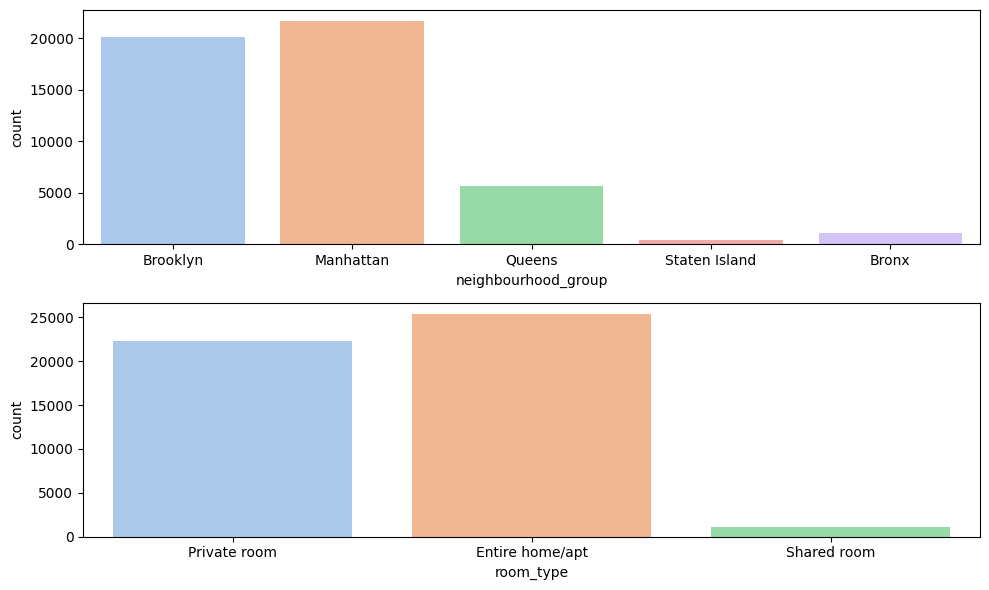

In [11]:
fig, axis = plt.subplots(2, figsize=(10,6))
sns.countplot(ax = axis[0], data = df, x = 'neighbourhood_group', palette='pastel', hue='neighbourhood_group', legend=False)
sns.countplot(ax = axis[1], data = df, x = 'room_type', palette='pastel', hue='room_type', legend=False)

plt.tight_layout()
plt.show()


In [12]:
df.describe()
print("number_of_reviews, minimum_nights, calculated_host_listings_count, availability_365, price")

number_of_reviews, minimum_nights, calculated_host_listings_count, availability_365, price


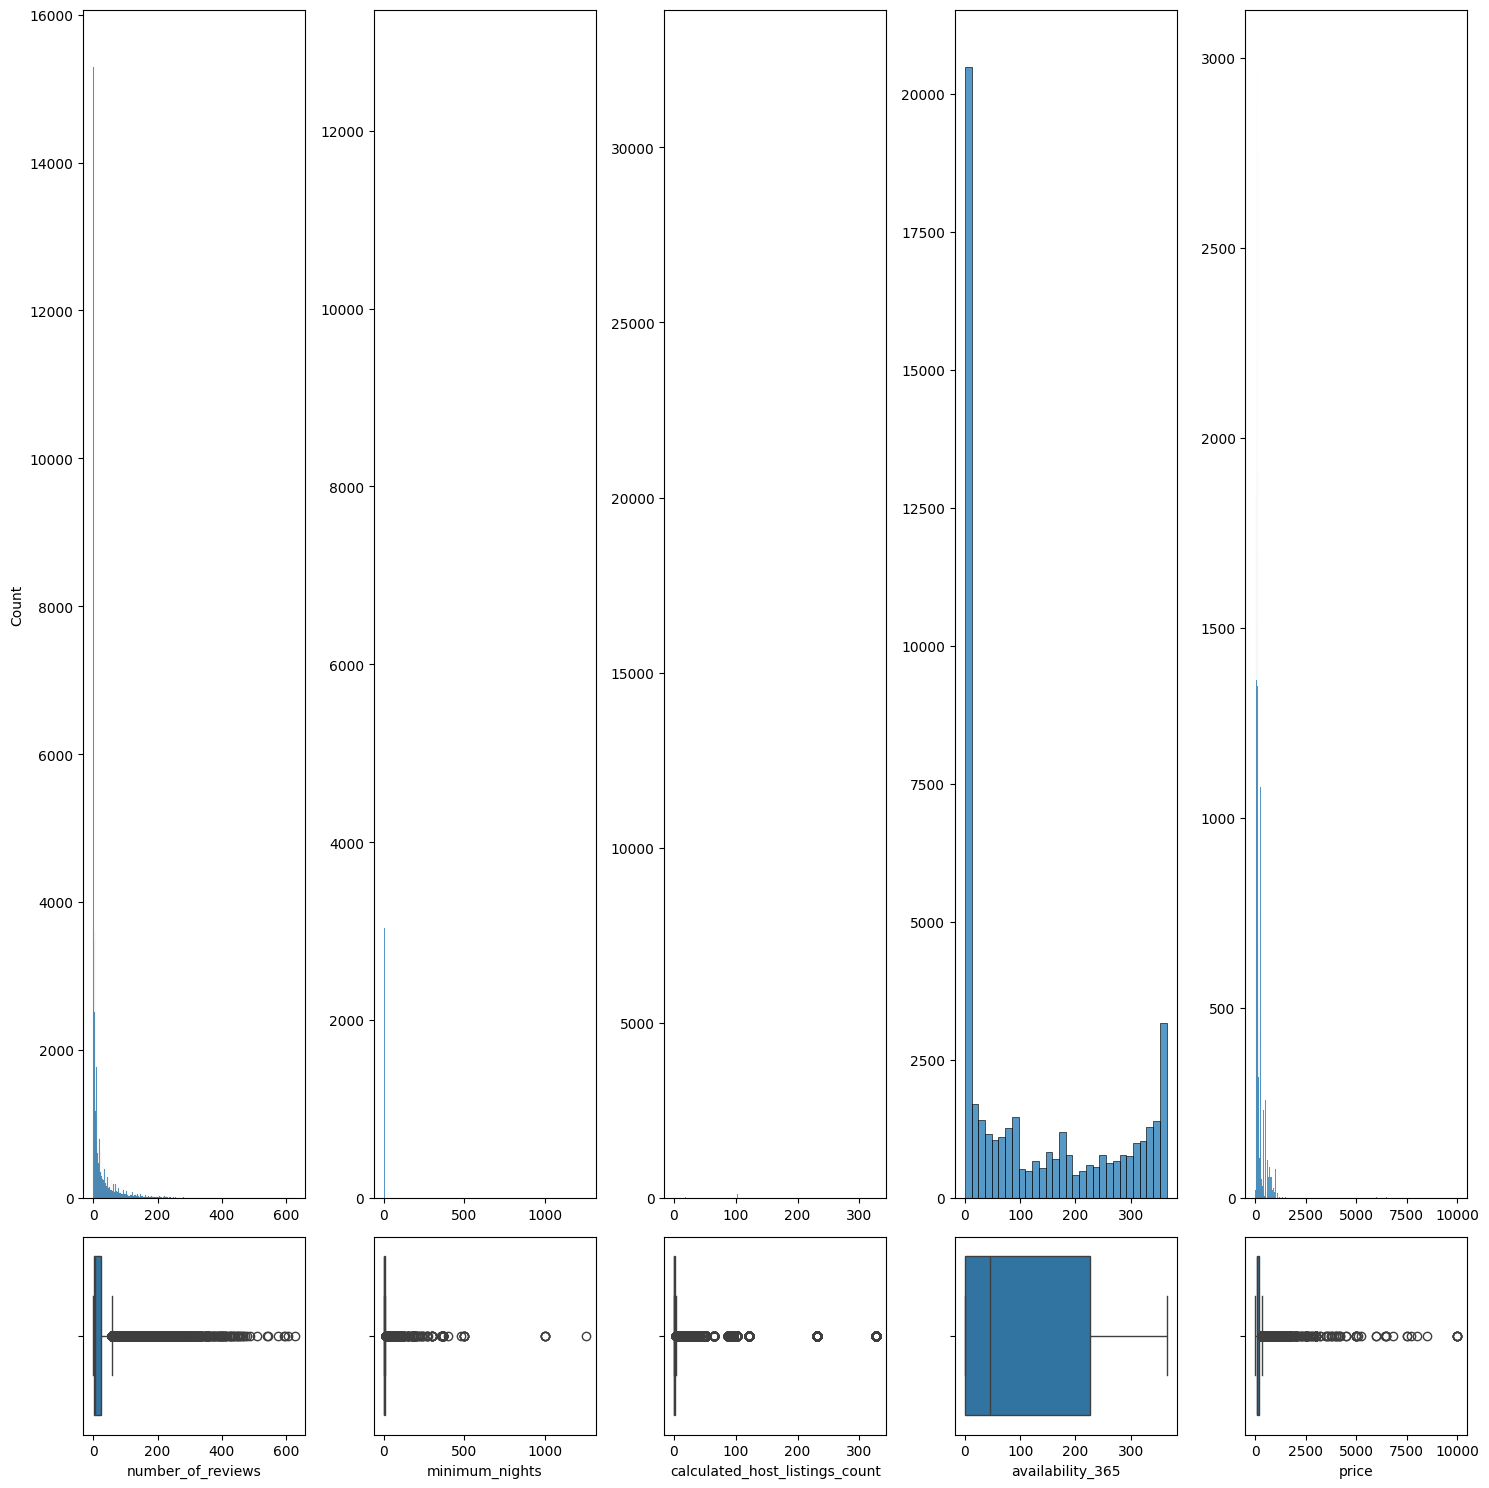

In [13]:
fig, axis = plt.subplots(2, 5, figsize = (15, 15), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[0, 2], data = df, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "calculated_host_listings_count")

sns.histplot(ax = axis[0, 3], data = df, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "availability_365")

sns.histplot(ax = axis[0, 4], data = df, x = "price").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 4], data = df, x = "price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [14]:
zeros = df['availability_365'] == 0

print((zeros.sum()/len(df))*100)

zero_revs = df['number_of_reviews'] == 0
print(zero_revs.sum())

35.858472236424994
10052


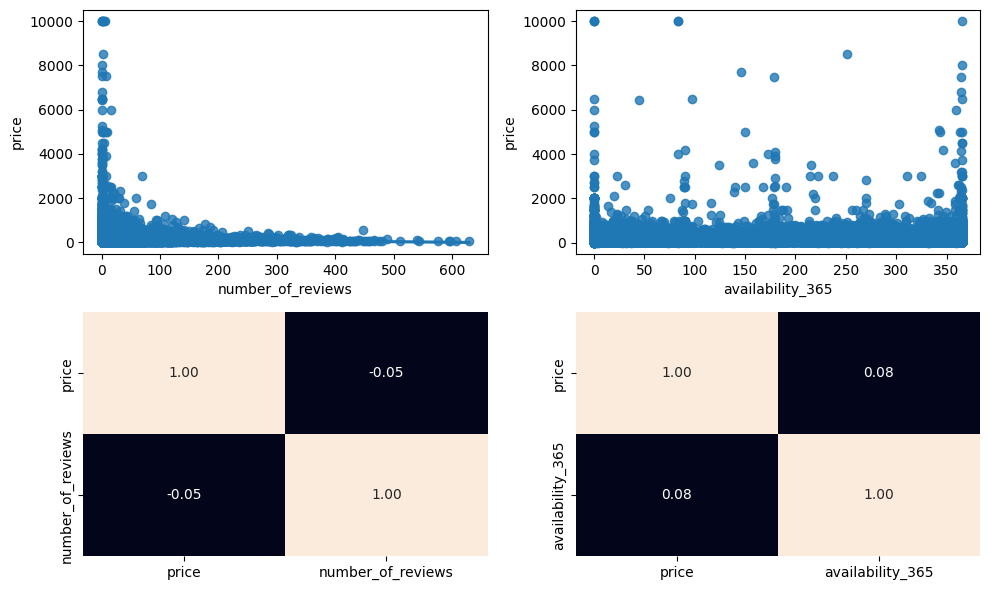

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

sns.regplot(ax = axis[0, 0], data = df, x='number_of_reviews', y = 'price')
sns.heatmap(df[['price', 'number_of_reviews']].corr(), annot=True, fmt='.2f', ax = axis[1, 0], cbar = False )

sns.regplot(ax = axis[0, 1], data = df, x='availability_365', y = 'price')
sns.heatmap(df[['price', 'availability_365']].corr(), annot=True, fmt='.2f', ax = axis[1, 1], cbar = False )


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


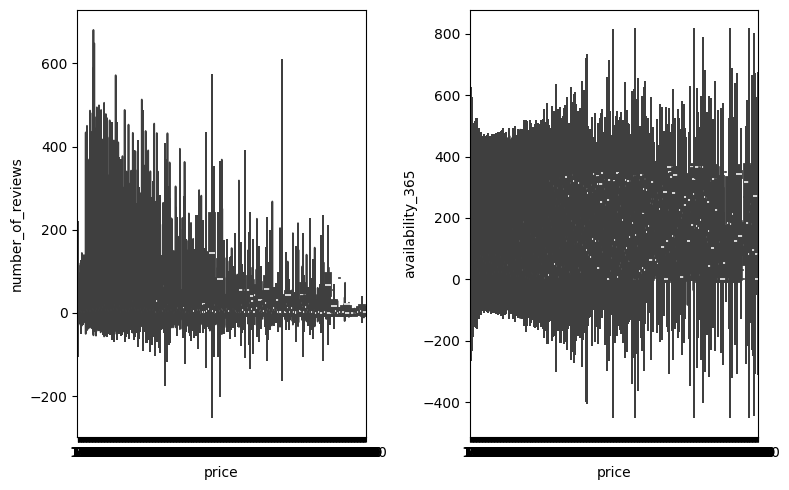

In [16]:
fig, axis = plt.subplots(1, 2, figsize = (8, 5))

sns.violinplot(ax = axis[0], x='price', y='number_of_reviews', data=df)
sns.violinplot(ax = axis[1], x='price', y='availability_365', data=df)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

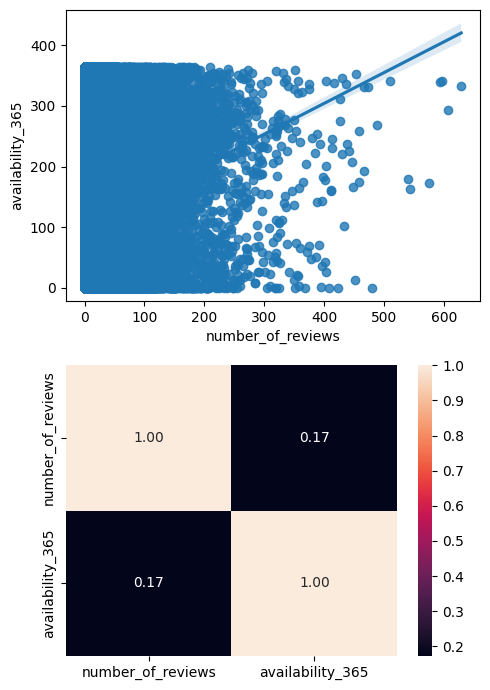

In [17]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df, x = "number_of_reviews", y = "availability_365")
sns.heatmap(df[["number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



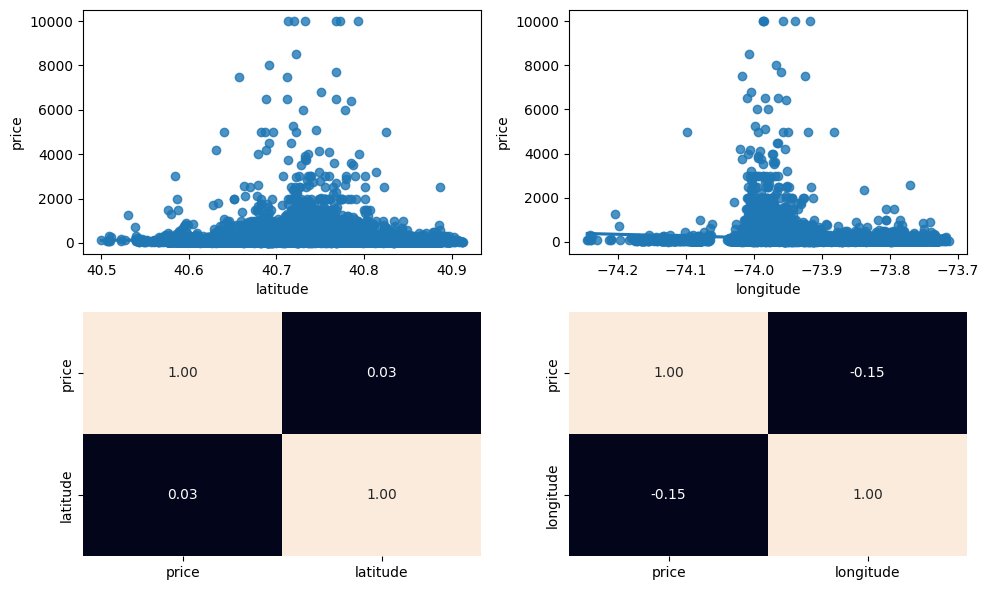

In [18]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

sns.regplot(ax = axis[0, 0], data = df, x='latitude', y = 'price')
sns.heatmap(df[['price', 'latitude']].corr(), annot=True, fmt='.2f', ax = axis[1, 0], cbar = False )

sns.regplot(ax = axis[0, 1], data = df, x='longitude', y = 'price')
sns.heatmap(df[['price', 'longitude']].corr(), annot=True, fmt='.2f', ax = axis[1, 1], cbar = False )


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

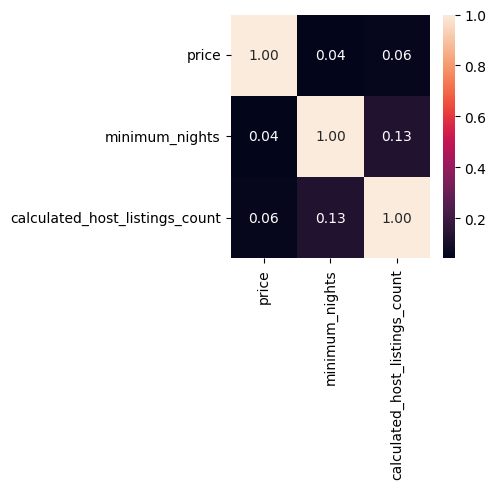

In [19]:
fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df[["price", "minimum_nights", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [20]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Profile Report')
print(profile)

11


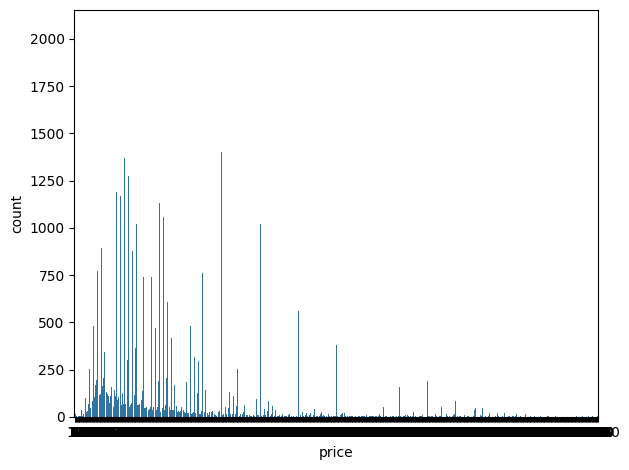

In [21]:
df.price.value_counts(ascending=False)
gratis = df['price'] == 0

print(gratis.sum())
sns.countplot(data=df, x= 'price')
plt.tight_layout()
plt.show()

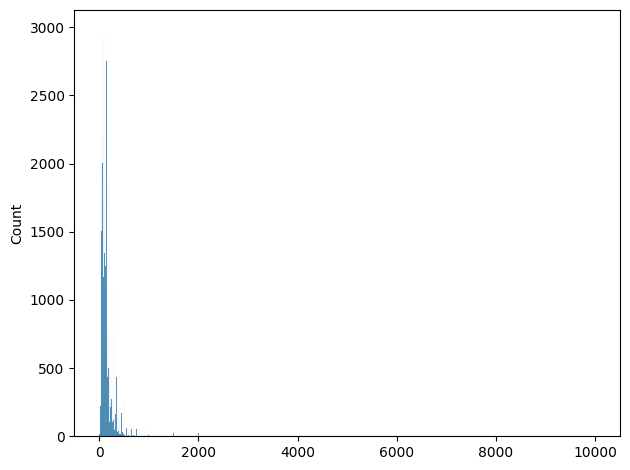

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [22]:
sns.histplot(data=df, x='price').set(xlabel=None)
plt.tight_layout()
plt.show()
df['price'].describe()

In [23]:
id_max = df['price'].idxmax()
print(df.loc[[id_max], ['neighbourhood_group', 'room_type', 'minimum_nights']])

print(10000/100)
x = df['minimum_nights'] == 0
print(x.sum())



     neighbourhood_group     room_type  minimum_nights
9151              Queens  Private room             100
100.0
0


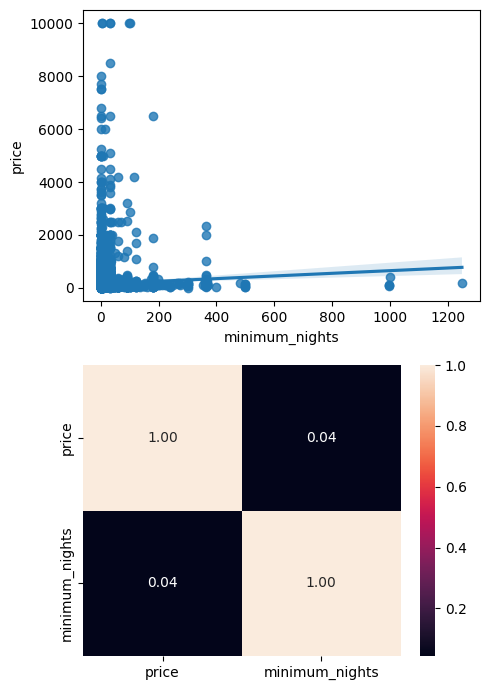

In [24]:
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax = axis[0], data=df, x='minimum_nights', y='price')
sns.heatmap(df[['price', 'minimum_nights']].corr(), annot = True, fmt = '.2f', ax = axis[1])

plt.tight_layout()
plt.show()

In [25]:
vacio = df['neighbourhood'].value_counts() == 0
print(vacio.sum())

0


In [26]:
casivacio = df['neighbourhood'].value_counts() == 1
print(casivacio.index.tolist())

casivacio_n = []


['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side', "Hell's Kitchen", 'East Village', 'Upper East Side', 'Crown Heights', 'Midtown', 'East Harlem', 'Greenpoint', 'Chelsea', 'Lower East Side', 'Astoria', 'Washington Heights', 'West Village', 'Financial District', 'Flatbush', 'Clinton Hill', 'Long Island City', 'Prospect-Lefferts Gardens', 'Park Slope', 'East Flatbush', 'Fort Greene', 'Murray Hill', 'Kips Bay', 'Flushing', 'Ridgewood', 'Greenwich Village', 'Sunset Park', 'Chinatown', 'Sunnyside', 'SoHo', 'Prospect Heights', 'Morningside Heights', 'Gramercy', 'Ditmars Steinway', 'Theater District', 'South Slope', 'Nolita', 'Inwood', 'Gowanus', 'Elmhurst', 'Woodside', 'Carroll Gardens', 'Jamaica', 'East New York', 'Jackson Heights', 'East Elmhurst', 'Boerum Hill', 'Tribeca', 'Kensington', 'Sheepshead Bay', 'Windsor Terrace', 'Brooklyn Heights', 'Canarsie', 'Forest Hills', 'Bay Ridge', 'Borough Park', 'Cypress Hills', 'Little Italy', 'Maspeth', 'Midwood', 'Rego P

In [27]:
df.isnull().sum().sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [28]:
nhg_avgprices = df.groupby('neighbourhood_group')['price'].mean().reset_index()
print(nhg_avgprices.sort_values(by='price'))

nh_avgprices = df.groupby('neighbourhood')['price'].mean().reset_index()
print(nh_avgprices.sort_values(by='price'))

  neighbourhood_group       price
0               Bronx   87.496792
3              Queens   99.517649
4       Staten Island  114.812332
1            Brooklyn  124.383207
2           Manhattan  196.875814
      neighbourhood       price
27      Bull's Head   47.333333
102     Hunts Point   50.500000
196         Tremont   51.545455
179       Soundview   53.466667
141        New Dorp   57.000000
..              ...         ...
167       Riverdale  442.090909
174        Sea Gate  487.857143
197         Tribeca  490.638418
219         Woodrow  700.000000
82   Fort Wadsworth  800.000000

[221 rows x 2 columns]


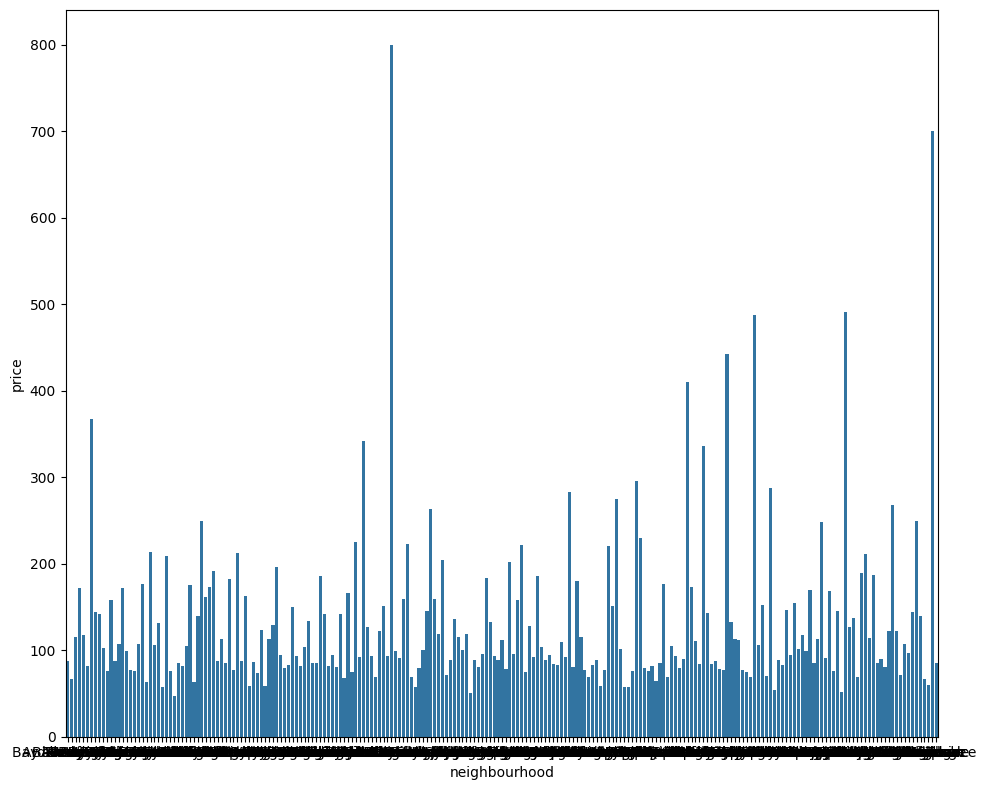

In [29]:
plt.figure(figsize=(10, 8))
sns.barplot(data = nh_avgprices, x = 'neighbourhood', y= 'price')
plt.tight_layout()

plt.show()

In [30]:
nh_avgprices.describe()



,price
count,221.000000
mean,133.248493
std,94.530766
min,47.333333
25%,81.730769
50%,101.800000
75%,152.714286
max,800.000000


In [31]:
# quiero encontrar si hay un barrio cuyo precio minimo 
# sea mayor que el máximo de otro barrio

mins = df.groupby('neighbourhood')['price'].min().reset_index()
maxs = df.groupby('neighbourhood')['price'].max().reset_index()

mins.columns = ['neighbourhood', 'minimum_price']
maxs.columns = ['neighbourhood', 'maximum_price']


minsmax = pd.merge(mins, maxs)
print(minsmax)

print(minsmax['minimum_price'].max())
print(minsmax['maximum_price'].min())

chetaos = []

for index, row in minsmax.iterrows():
    other_neighbourhoods = minsmax[minsmax['neighbourhood'] != row['neighbourhood']]
    if (row['minimum_price'] > other_neighbourhoods['maximum_price'].all()):
        chetaos.append(row['neighbourhood'])

print(chetaos)






       neighbourhood  minimum_price  maximum_price
0           Allerton             33            450
1      Arden Heights             41             83
2           Arrochar             32            625
3            Arverne             35           1500
4            Astoria             25          10000
..               ...            ...            ...
216  Windsor Terrace             38            450
217        Woodhaven             10            250
218         Woodlawn             29             85
219          Woodrow            700            700
220         Woodside             28            500

[221 rows x 3 columns]
800
57
['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria', 'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace', 'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater', 'Belle Harbor', 'Bellerose', 'Belmont', 'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale', 

In [49]:
mins_nozero = mins.loc[(mins['minimum_price'] > 0)]
print(mins_nozero.sort_values(by='minimum_price',ascending=False).head(20))
print(maxs.sort_values(by='maximum_price', ascending=True).head(20))

       neighbourhood  minimum_price
82    Fort Wadsworth            800
219          Woodrow            700
215      Willowbrook            249
139         Neponsit            200
21      Breezy Point            195
114  Lighthouse Hill            115
100     Howland Hook            100
93       Grymes Hill             89
129       Mill Basin             85
14      Belle Harbor             85
157     Prince's Bay             85
98        Holliswood             79
208       West Farms             79
165     Richmondtown             78
101         Huguenot             75
144             NoHo             75
42        Co-op City             75
172        Rossville             75
53             DUMBO             74
174         Sea Gate             71
      neighbourhood  maximum_price
141        New Dorp             57
172       Rossville             75
165    Richmondtown             78
42       Co-op City             80
27      Bull's Head             80
177     Silver Lake             80

In [105]:
neighbourhoods_counts = df['neighbourhood'].value_counts()

x = 62
y = 62

small_nh = neighbourhoods_counts[neighbourhoods_counts < x].index.to_list()
big_nh = neighbourhoods_counts[neighbourhoods_counts > y].index.to_list()


df_small_nh = df[df['neighbourhood'].isin(small_nh)]
df_big_nh = df[df['neighbourhood'].isin(big_nh)]

vcounts_df_small_nh = df_small_nh['neighbourhood'].value_counts()
vcounts_df_big_nh = df_big_nh['neighbourhood'].value_counts()

print(f"Number of neighbourhoods with less than {x} houses: {len(small_nh)}")
print(f"Number of neighbourhoods with more than {y} houses: {len(big_nh)}")
print("")
print(f"Number of houses in nh with less than {x} houses: {len(df_small_nh)}")
print(f"Number of houses in nh with more than {y} houses: {len(df_big_nh)}")
print("")
print(f"Average n. of houses in small_nh: {vcounts_df_small_nh.mean()}")
print(f"Average n. of houses in big_nh: {vcounts_df_big_nh.mean()}")

print(f"Percentage of small_nh in the dataset: {round((len(df_small_nh)/len(df))*100, 3)}%")
print(f"Percentage of big_nh in the dataset: {round((len(df_big_nh)/len(df))*100, 3)}%")


print(len(df))


Number of neighbourhoods with less than 62 houses: 134
Number of neighbourhoods with more than 62 houses: 85

Number of houses in nh with less than 62 houses: 2415
Number of houses in nh with more than 62 houses: 46356

Average n. of houses in small_nh: 18.02238805970149
Average n. of houses in big_nh: 545.364705882353
Percentage of small_nh in the dataset: 4.939%
Percentage of big_nh in the dataset: 94.807%
48895


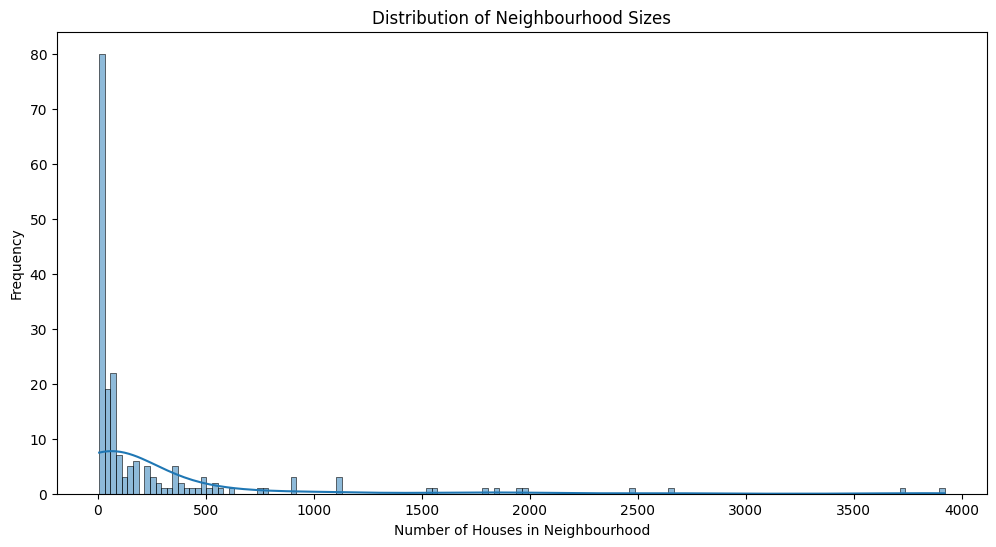

In [97]:
acc_nh_counts = df_big_nh['neighbourhood'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(acc_nh_counts, bins=150, kde=True)
plt.xlabel('Number of Houses in Neighbourhood')
plt.ylabel('Frequency')
plt.title('Distribution of Neighbourhood Sizes')
plt.show()

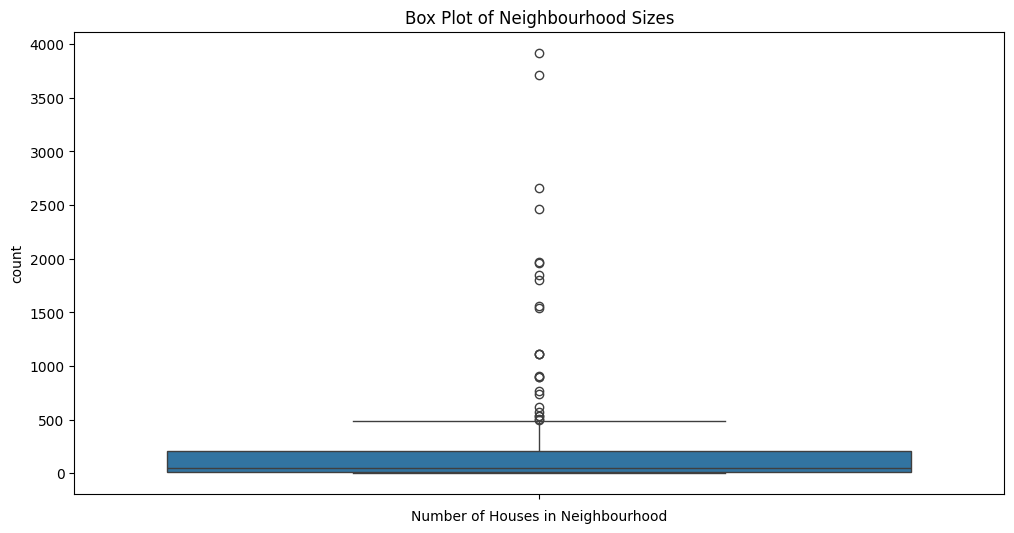

In [98]:
plt.figure(figsize=(12, 6))
sns.boxplot(acc_nh_counts)
plt.xlabel('Number of Houses in Neighbourhood')
plt.title('Box Plot of Neighbourhood Sizes')
plt.show()

In [127]:
# quiero encontrar un número minimo de casas en el vecindario:
# que haya una probabilidad de menos de 1% de que todas caigan
# en el mismo split al hacer el modelado

import math

# E = Todas las casas de un mismo barrio caigan en el mismo split
# p^n + q^n < 0.01 (p_min)
# donde p es la probabilidad de que caiga en el train set y q en test
# teniendo en cuenta que el split es 80% train y 20% test:
p_train = 0.8
p_test = 0.2
prob_min = 0.01 # el estándar de probabilidad que quiero (max prob permitida para E)

# computando por n = el numero minimo de casas en un vecindario
n_train = math.log(prob_min) / math.log(p_train)

n_test = math.log(prob_min) / math.log(p_test)

print(n_train, n_test)

# usaremos la más restrictiva --> n_train
print("Los vecindarios que tengan más de 21 casas")
print(f"tienen menos de un {prob_min*100}% de probabilidad")
print("de que todas sus casas caigan en el mismo split")








20.637702317032343 2.861353116146786
Los vecindarios que tengan más de 21 casas
tienen menos de un 1.0% de probabilidad
de que todas sus casas caigan en el mismo split


In [153]:
# veámoslo con un ejemplo

from sklearn.model_selection import train_test_split

x = 30

bigger_nh = neighbourhoods_counts[neighbourhoods_counts >= x].index
nh_filtered_df = df[df['neighbourhood'].isin(bigger_nh)]
print(len(nh_filtered_df))
print(f"{round(abs(((len(df) - len(nh_filtered_df))/ len(df))*100), 3)}% deleted from dataset")

def modeling_probability(veces):
     exito = 0
     error = 0
     faltante_en_train = 0
     faltante_en_test = 0
     doble_fallo = 0

     for i in range(veces):
          # We split the set for train and test 
          X = nh_filtered_df.drop("price", axis = 1)
          y = nh_filtered_df['price']
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

          train_neighbourhoods = set(X_train['neighbourhood'].unique())
          test_neighbourhoods = set(X_test['neighbourhood'].unique())

          missing_in_train = test_neighbourhoods - train_neighbourhoods
          missing_in_test  = train_neighbourhoods - test_neighbourhoods 

          if len(missing_in_train) == 0 and len(missing_in_test) == 0:
               exito += 1

          else:
               if len(missing_in_train) > 0 and len(missing_in_test) > 0:
                    faltante_en_train += 1
                    faltante_en_test += 1
                    doble_fallo += 1

               elif len(missing_in_train) > 0:
                    faltante_en_train += 1

               elif len(missing_in_test) > 0:
                    faltante_en_test += 1

               error += 1


     print(f"Faltantes en test = {faltante_en_test}")
     print(f"Faltantes en train = {faltante_en_train}")
     print("")
     print(f"Con un mínimo de {x} casas por vecindario: ")
     return f'P(error) = {round((error/veces)*100, 3)}, P(exito) = {round((exito/veces)*100, 3)}'

modeling_probability(1000)

47736
2.37% deleted from dataset
Faltantes en test = 4
Faltantes en train = 0

Con un mínimo de 30 casas por vecindario: 


'P(error) = 0.4, P(exito) = 99.6'